In [49]:
# Comment:  Imports and Libraries

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import xgboost as xgb
from sklearn.metrics import mean_squared_error

from math import sqrt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV


%matplotlib inline


In [50]:
path = '/content/drive/My Drive/PotatoBlight.xls'
df = pd.read_excel(path)

In [51]:
backup = df.copy()

In [52]:
df.Date = pd.to_datetime(df.Date)

In [53]:
df['month'] = df['Date'].dt.month 

In [54]:
df['day'] = df['Date'].dt.day

In [55]:
df.head(3)

,Date,jd,DAP,TMIN,TMAX,TMEAN,Rain days>0.1mm,GDD,Accu. GDD,Daily blight obsrv.,Tmin>8,Tmax<25,Rain,Count of IP requirements,1 if count=3,IP Result,Season,month,day
0,2002-11-01,304,40,19.1,29.0,24.05,0,14.05,14.05,0.0,1,0,0,1,0,0,1,11,1
1,2002-11-02,305,41,17.8,31.1,24.45,0,14.45,28.50,0.0,1,0,0,1,0,0,1,11,2
2,2002-11-03,306,42,18.8,31.9,25.35,0,15.35,43.85,0.0,1,0,0,1,0,0,1,11,3


In [56]:
df = df.drop(['Date','jd','Tmin>8','Tmax<25','Rain','Count of IP requirements',\
                        '1 if count=3', 'Season'], axis=1)

In [57]:
def get_mean_last_three_weeks(ds):
  mean_value = 0
  rows = ds.shape[0]
  meanlast3 = np.zeros(rows)
  mean_value = np.sum(ds[:2])
  meanlast3[:2] = mean_value / 2
  for i in range(2, rows):
      mean_value += ds[i]
      meanlast3[i] = mean_value / 3
      mean_value -= ds[i-2]
  return meanlast3

In [58]:
df['lastDS'] = df['Daily blight obsrv.'].shift()
meanlast3DS = get_mean_last_three_weeks(np.array(df['Daily blight obsrv.']))
df['meanlast3DS'] = meanlast3DS
df.head()

,DAP,TMIN,TMAX,TMEAN,Rain days>0.1mm,GDD,Accu. GDD,Daily blight obsrv.,IP Result,month,day,lastDS,meanlast3DS
0,40,19.1,29.0,24.05,0,14.05,14.05,0.0,0,11,1,NaN,0.0
1,41,17.8,31.1,24.45,0,14.45,28.50,0.0,0,11,2,0.0,0.0
2,42,18.8,31.9,25.35,0,15.35,43.85,0.0,0,11,3,0.0,0.0
3,43,20.3,29.0,24.65,0,14.65,58.50,0.0,0,11,4,0.0,0.0
4,44,19.8,29.1,24.45,0,14.45,72.95,0.0,0,11,5,0.0,0.0


In [59]:
df.dropna(inplace=True)
df.head()

,DAP,TMIN,TMAX,TMEAN,Rain days>0.1mm,GDD,Accu. GDD,Daily blight obsrv.,IP Result,month,day,lastDS,meanlast3DS
1,41,17.8,31.1,24.45,0,14.45,28.50,0.0,0,11,2,0.0,0.0
2,42,18.8,31.9,25.35,0,15.35,43.85,0.0,0,11,3,0.0,0.0
3,43,20.3,29.0,24.65,0,14.65,58.50,0.0,0,11,4,0.0,0.0
4,44,19.8,29.1,24.45,0,14.45,72.95,0.0,0,11,5,0.0,0.0
5,45,13.9,28.1,21.00,0,11.00,83.95,0.0,0,11,6,0.0,0.0


In [60]:
column_names =['DAP','TMIN','TMAX','TMEAN','Rain days>0.1mm','GDD','Accu. GDD','IP Result',\
               'lastDS','meanlast3DS','month','day','Daily blight obsrv.']
df = df.reindex(columns=column_names)

In [61]:
X, y = df.iloc[:,:-1],df.iloc[:,-1]

In [62]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [ ]:
i = [i for i in range (4,150)]


In [64]:

objective = "reg:linear"
seed = 100
n_estimators = 100
learning_rate = 0.1
gamma = 0.1
subsample = 0.8
colsample_bytree =1
reg_alpha = 0.5
reg_lambda = 0.5
silent = False
max_depth = 6
min_child_weight = 0
subsample = 1.0
rmse=[]
rrmse=[]
parameters = {}
parameters['objective'] = objective
parameters['seed'] = seed
parameters['n_estimators'] = n_estimators
parameters['learning_rate'] = learning_rate
parameters['gamma'] = gamma
parameters['colsample_bytree'] = colsample_bytree
parameters['reg_alpha'] = reg_alpha
parameters['reg_lambda'] = reg_lambda
parameters['silent'] = silent

#i = [i for i in range (4,150)]

for i in range (4,150):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
  xg_reg = xgb.XGBRegressor(objective = objective,
                                        seed = seed,
                                        n_estimators = n_estimators,
                                        learning_rate = learning_rate,
                                        gamma = gamma,
                                        subsample = subsample,
                                        colsample_bytree = colsample_bytree,
                                        reg_alpha = reg_alpha,
                                        reg_lambda = reg_lambda,
                                        silent = silent)
  xg_reg.fit(X_train,y_train)
  preds = xg_reg.predict(X_test)
  r= np.sqrt(mean_squared_error(y_test, preds))
  rr = np.sqrt(mean_squared_error(y_test, preds))/np.mean(y_test)
  rmse.append(r)
  rrmse.append(rr)
#print("RMSE: %f" % (rmse*100))
#print("RRMSE: %f " % (rrmse*100)) 
                  
#map (min,rrmse)     
#map (max,rrmse)
#map (min,RRMSE)     





[19:17:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:17:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:17:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:17:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:17:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:17:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:17:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:17:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [82]:
#print("RMSE: %f" % (rmse*100))
#print("RRMSE: %f " % (rrmse*100)) 
x = np.array(rrmse)
print('max: {}'.format(x.max()))
print('min:{}'.format(x.min()))
print('mean:{}'.format(x.mean()))


max: 0.4321548486086579
min:0.028173069342853525
mean:0.09678606174715941


In [ ]:
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

[08:05:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
rrmse = np.sqrt(mean_squared_error(y_test, preds))/np.mean(y_test)
print("RMSE: %f" % (rmse*100))
print("RRMSE: %f " % (rrmse*100))

RMSE: 68.013160
RRMSE: 4.117305 


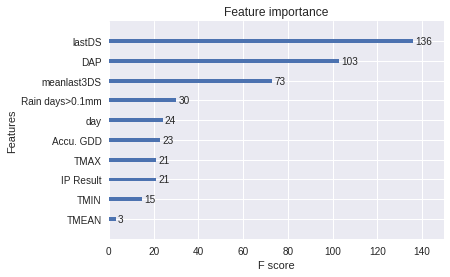

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [7, 5]
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
rmse = []
rrmse = []
for j in range (3,115):
  cv_results = xgb.cv(dtrain=data_dmatrix, params=parameters, nfold=j,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse",\
                    as_pandas=True, seed=seed)
  rmse =cv_results["test-rmse-mean"].tail(1)
  rrmse =(rmse/np.mean(y_test))*100

#print("RRMSE: %f " % (rrmse))
  


[19:51:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:51:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:51:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:51:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:51:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:51:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:51:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:51:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
  cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,29.034805,0.166099,21.536169,19.193786
1,26.202966,0.149245,19.453051,17.300995
2,23.648791,0.134409,17.567701,15.603058
3,21.345026,0.120965,15.841329,14.068489
4,19.267828,0.108178,14.316372,12.696006


In [ ]:
rmse =cv_results["test-rmse-mean"].tail(1)
rrmse =(rmse/np.mean(y_test))*100
print("RRMSE: %f " % (rrmse))

RRMSE: 3.258515 


In [ ]:
xg_reg = xgb.train(params=parameters, dtrain=data_dmatrix, num_boost_round=10)

[08:06:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


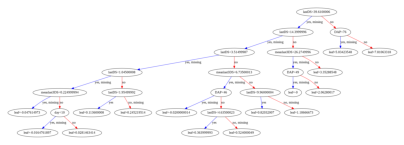

In [ ]:
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [30, 60]
plt.show()

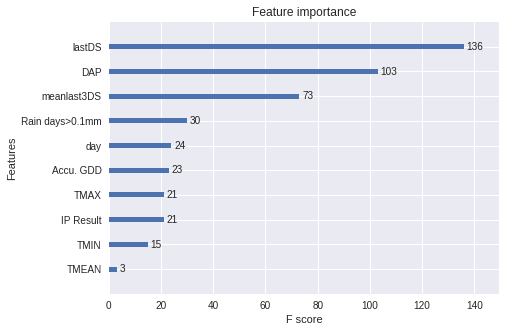

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [7,5]
plt.show()